In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'clean_data_v2.csv'
data = pd.read_csv(file, index_col = 0)
data.head()

,IncidentDate,IncidentTime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,...,SubjectGender: Male,SubjectGender: Other,SubjectEthnicity: Asian,SubjectEthnicity: Black,SubjectEthnicity: Chinese,SubjectEthnicity: Unknown,SubjectEthnicity: Mixed,SubjectEthnicity: Other,SubjectEthnicity: White,Was Force Needed?
0,2020-04-01,00:12:00,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2020-04-01,01:30:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2020-04-01,03:30:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2020-04-01,04:25:00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,2020-04-01,04:12:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [3]:
for i in data.columns:
    print(i)

IncidentDate
IncidentTime
Incident Location: Street/Highway
Incident Location: Public Transport
Incident Location: Retail Premises
Incident Location: Open ground (e.g. park, car park, field)
Incident Location: Licensed Premises
Incident Location: Sports or Event Stadia
Incident Location: Hospital/A&E (non-mental-health setting)
Incident Location: Mental Health Setting
Incident Location: Police vehicle with prisoner handling cage
Incident Location: Police vehicle without prisoner handling cage
Incident Location: Dwelling
Incident Location: Police station (excluding custody block)
Incident Location: Custody Block
Incident Location: Ambulance
Incident Location: Other
Borough
PrimaryConduct
AssaultedBySubject
Impact Factor: Possesion of a weapon
Impact Factor: Alcohol
Impact Factor: Drugs
Impact Factor: Mental Health
Impact Factor: Prior Knowledge
Impact Factor: Size/Gender/Build
Impact Factor: Acute Behavioural Disorder
Impact Factor: Crowd
Impact Factor: Other
Reason for Force: Protect s

6 levels of age ranges: Change varaibles to numbers representing ranges.

- 1 = 1-10
- 2 = 11-17
- 3 = 18-34
- 4 = 35-49
- 5 = 50-64
- 6 = 65+

In [4]:
age = data[['SubjectGender: Female', 'SubjectGender: Male', 'SubjectGender: Other', 'SubjectAge', 'Was Force Needed?']]
age

,SubjectGender: Female,SubjectGender: Male,SubjectGender: Other,SubjectAge,Was Force Needed?
0,0,1,0,3,0
1,1,0,0,2,1
2,1,0,0,4,1
3,0,1,0,3,1
4,1,0,0,3,1
...,...,...,...,...,...
147890,0,1,0,3,1
147891,0,1,0,3,0
147892,0,1,0,4,1
147893,0,1,0,3,0


# Subject Age Distribution

In [10]:
age['SubjectAge'].value_counts()

3    84545
4    35886
2    16094
5    10401
6      923
1       46
Name: SubjectAge, dtype: int64

In [16]:
ranges = ['0-10',
         '11-17',
         '18-34',
         '35-49',
         '50-64',
         '65+']

In [83]:
agedist = dict(age['SubjectAge'].value_counts())
agedist = pd.DataFrame.from_dict(agedist, orient = 'index', columns = ['Counts'])
agedist = agedist.sort_index()
agedist['AgeRange'] = ranges
agedist

,Counts,AgeRange
1,46,0-10
2,16094,11-17
3,84545,18-34
4,35886,35-49
5,10401,50-64
6,923,65+


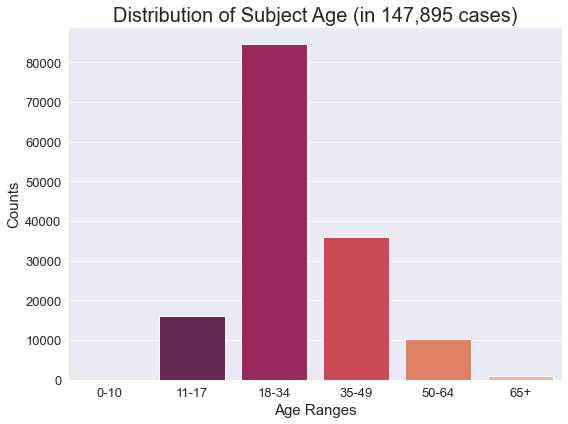

In [37]:
# Visualize data
plt.figure(figsize=(8, 6))
ax = sns.set_style('darkgrid')
ax = sns.barplot(x=agedist['AgeRange'], y = agedist['Counts'], palette = 'rocket')
ax.set_xlabel('Age Ranges', fontsize = 15)
ax.set_ylabel('Counts', fontsize = 15)
ax.axes.set_title('Distribution of Subject Age (in 147,895 cases)', fontsize = 20)
plt.xticks()
plt.tick_params(labelsize = 13)
plt.tight_layout()

In [45]:
# Adjust dataframe for pie chart
agedist = agedist.append({'Counts': 969, 'AgeRange': 'Other'}, ignore_index = True)
agedist

,Counts,AgeRange
0,46,0-10
1,16094,11-17
2,84545,18-34
3,35886,35-49
4,10401,50-64
5,923,65+
6,969,Other


In [46]:
agedist.drop([0, 5], inplace = True)
agedist

,Counts,AgeRange
1,16094,11-17
2,84545,18-34
3,35886,35-49
4,10401,50-64
6,969,Other


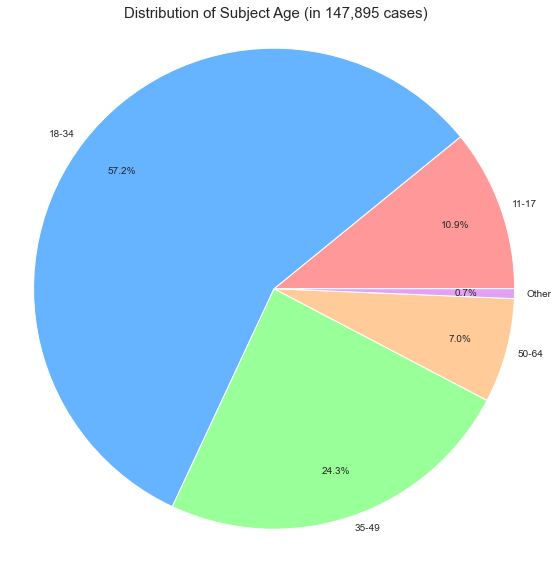

In [52]:
pie, ax = plt.subplots(figsize = (8,8))
labels = agedist['AgeRange']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#e3a1f4', '#a1f4ea']
plt.pie(x = agedist['Counts'], autopct="%.1f%%", labels = labels,
       pctdistance = 0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 10}, radius = 0.5)
plt.title('Distribution of Subject Age (in 147,895 cases)', fontsize = 15)
ax.axis('square')
plt.tight_layout()

- 18-34 is the age range which most commits offences, consisting up to 84,545 records or 57.2% of available records.
- 35-49 being the second largest group at 35,886 records, or 24.3%.

# Subject Age Distribution which requires Force

In [86]:
ageforce = age[age['Was Force Needed?'] == 1]
ranges = ['0-10',
         '11-17',
         '18-34',
         '35-49',
         '50-64',
         '65+']
ageforce = dict(ageforce['SubjectAge'].value_counts())
ageforce = pd.DataFrame.from_dict(ageforce, orient = 'index', columns = ['Counts'])
ageforce = ageforce.sort_index()
ageforce['AgeRange'] = ranges
ageforce

,Counts,AgeRange
1,42,0-10
2,7321,11-17
3,38767,18-34
4,16410,35-49
5,4897,50-64
6,513,65+


In [90]:
combined = pd.concat([agedist, ageforce])
combined['Force'] = ['Force required',
                     'Force required',
                    'Force required',
                    'Force required',
                    'Force required',
                    'Force required',
                    'Force not required',
                    'Force not required',
                    'Force not required',
                    'Force not required',
                    'Force not required',
                    'Force not required',]
combined

,Counts,AgeRange,Force
1,46,0-10,Force required
2,16094,11-17,Force required
3,84545,18-34,Force required
4,35886,35-49,Force required
5,10401,50-64,Force required
6,923,65+,Force required
1,42,0-10,Force not required
2,7321,11-17,Force not required
3,38767,18-34,Force not required
4,16410,35-49,Force not required


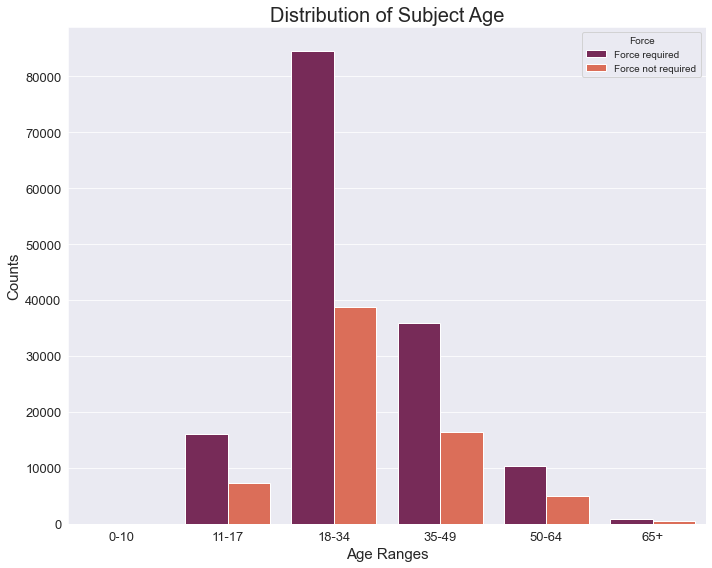

In [96]:
plt.figure(figsize = (10, 8))
ax =sns.barplot(x='AgeRange', y = 'Counts', data = combined, hue = 'Force', palette = 'rocket')
ax.set_xlabel('Age Ranges', fontsize = 15)
ax.set_ylabel('Counts', fontsize = 15)
ax.axes.set_title('Distribution of Subject Age', fontsize = 20)
plt.xticks()
plt.tick_params(labelsize = 13)
plt.tight_layout()


# Which Gender is more dangerous?

In [54]:
gen = age[age['Was Force Needed?'] == 1]
gen

,SubjectGender: Female,SubjectGender: Male,SubjectGender: Other,SubjectAge,Was Force Needed?
1,1,0,0,2,1
2,1,0,0,4,1
3,0,1,0,3,1
4,1,0,0,3,1
5,0,1,0,2,1
...,...,...,...,...,...
147881,0,1,0,3,1
147886,0,1,0,3,1
147887,0,1,0,3,1
147890,0,1,0,3,1


In [62]:
males = gen[gen['SubjectGender: Male'] == 1]
females = gen[gen['SubjectGender: Female'] == 1]
others = gen[gen['SubjectGender: Other'] == 1]
male_sum = np.sum(males['SubjectGender: Male'])
female_sum = np.sum(females['SubjectGender: Female'])
other_sum = np.sum(others['SubjectGender: Other'])
print('Total Force Needed cases: ', 67950)
print('Male: ', male_sum)
print('Female: ', female_sum)
print('Other: ', other_sum)

Total Force Needed cases:  67950
Male:  56646
Female:  10968
Other:  336


In [111]:
totals = {'Male': 56646, 'Female': 10968, 'Other': 336}
gender_force = pd.DataFrame.from_dict(totals, orient='index', columns = ['Counts'])
gender_force

,Counts
Male,56646
Female,10968
Other,336


In [112]:
males2 = age[age['SubjectGender: Male'] == 1]
females2 = age[age['SubjectGender: Female'] == 1]
others2 = age[age['SubjectGender: Other'] == 1]
male_sum2 = np.sum(males2['SubjectGender: Male'])
female_sum2 = np.sum(females2['SubjectGender: Female'])
other_sum2 = np.sum(others2['SubjectGender: Other'])
print('Total cases: ', 147895)
print('Male: ', male_sum2)
print('Female: ', female_sum2)
print('Other: ', other_sum2)

Total cases:  147895
Male:  129221
Female:  18114
Other:  560


In [114]:
#gender_force['Counts non-force'] = [129221, 18114, 560]
gender_force['Gender'] = ['Male', 'Female', 'Other']
gender_force = gender_force.append({'Counts': 129221, 'Gender': 'Male'}, ignore_index = True)
gender_force = gender_force.append({'Counts': 18114, 'Gender': 'Female'}, ignore_index = True)
gender_force = gender_force.append({'Counts': 560, 'Gender': 'Other'}, ignore_index = True)
gender_force['Force'] = ['Force required',
                         'Force required',
                         'Force required',
                        'No force required',
                        'No force required',
                        'No force required',]

gender_force

,Counts,Gender,Force
0,56646,Male,Force required
1,10968,Female,Force required
2,336,Other,Force required
3,129221,Male,No force required
4,18114,Female,No force required
5,560,Other,No force required


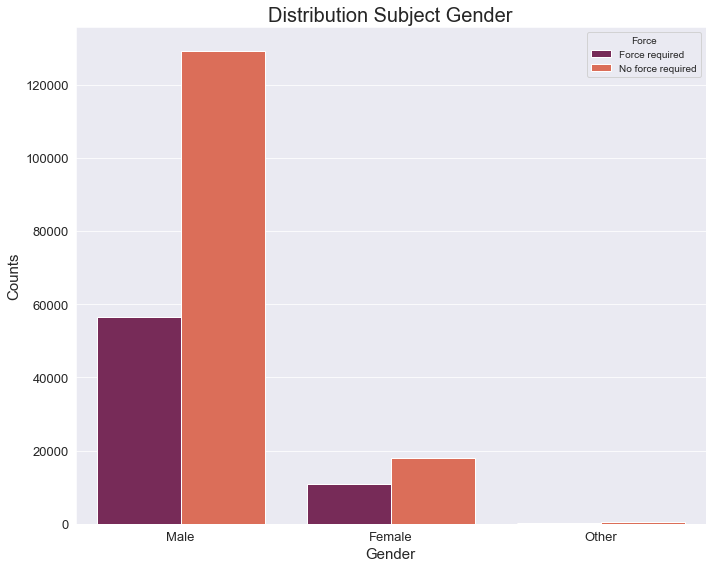

In [116]:
# Visualize data
plt.figure(figsize = (10, 8))
ax =sns.barplot(x='Gender', y = 'Counts', data = gender_force, hue = 'Force', palette = 'rocket')
ax.set_xlabel('Gender', fontsize = 15)
ax.set_ylabel('Counts', fontsize = 15)
ax.axes.set_title('Distribution Subject Gender', fontsize = 20)
plt.xticks()
plt.tick_params(labelsize = 13)
plt.tight_layout()

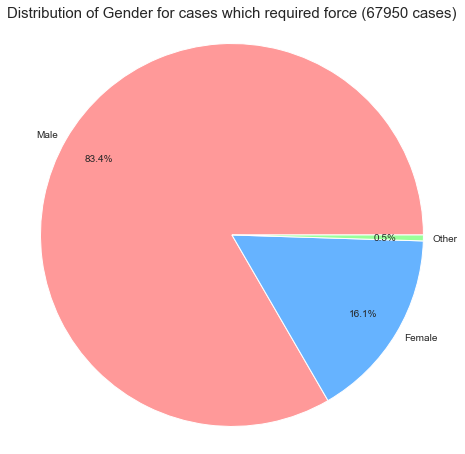

In [73]:
pie, ax = plt.subplots(figsize = (7,7))
labels = gender_force.index
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(x = gender_force['Counts'], autopct="%.1f%%", labels = labels,
       pctdistance = 0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 10}, radius = 0.25)
plt.title('Distribution of Gender for cases which required force (67950 cases)', fontsize = 15)
ax.axis('square')
plt.tight_layout()

- In cases which required force (67,950), majority are males.
- Male with 56646 cases at 83.4% of cases.
- Female 10968 cases at 16.1% of cases.
- Other	 336 cases at 0.5% of cases.